In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Principal Component Analysis (PCA)

/Users/edward/miniconda3/envs/hyug/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/edward/miniconda3/envs/hyug/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/edward/miniconda3/envs/hyug/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/edward/miniconda3/envs/hyug/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/edward/miniconda3/envs/hyug/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/edward/miniconda3/

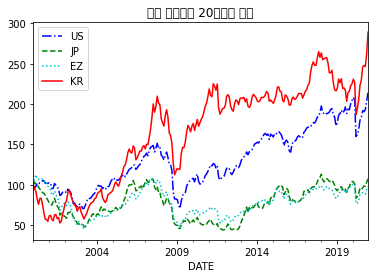

In [82]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(2000, 1, 1),
                               end=datetime.datetime(2020, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

#### [Wine Data](https://jalynne-kim.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9D-pca-principal-component-analysis-%EA%B3%BC-biplot-%EA%B0%9C%EB%85%90%EA%B3%BC-%EC%82%AC%EB%A1%80-%EB%A0%88%EB%93%9C%EC%99%80%EC%9D%B8-%EB%8D%B0%EC%9D%B4%ED%84%B0-437283592031)

In [46]:
from sklearn.datasets import load_wine
col = load_wine().feature_names
wine_df = pd.DataFrame(load_wine().data,columns = col)
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [69]:
scaler = StandardScaler()
scaled_wine = pd.DataFrame(scaler.fit_transform(wine_df), columns = col)

pca_wine = PCA()
pca_wine.fit(scaled_wine)

PCA()

In [70]:
print("\n Eigenvectors: \n", pca_wine.components_)
print("\n Eigenvalues: \n",pca_wine.explained_variance_)
B = pca_wine.transform(scaled_wine)
print("\n Projected Data: \n", B)
B.shape


 Eigenvectors: 
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [-0.21353865 -0.53681385 -0.15447466  0.10082451 -0.03814394  0.0841223
   0.01892002  0.25859401  0.53379539  0.41864414 -0.10598274 -0.26585107
  -0.11972557]
 [-0.

(178, 13)

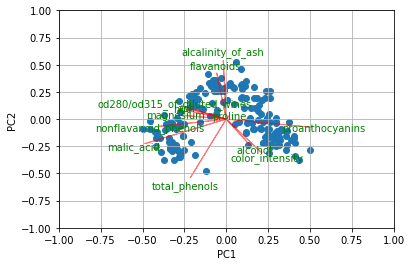

In [43]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    
biplot(B, pca_wine.components_, 1, 2, labels=wine_df.columns)

## Iris_Data

In [4]:
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
irisdf = pd.DataFrame(iris.data, columns = columns)

irisdf['target'] = iris.target
irisdf.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
irisdf.iloc[:,:-1].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


/Users/edward/miniconda3/envs/hyug/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

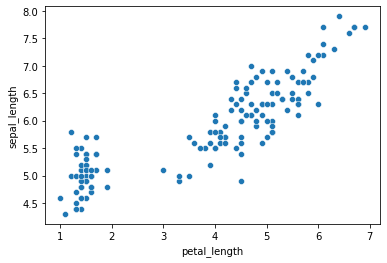

In [6]:
x = irisdf['petal_length']
y = irisdf['sepal_length']
sns.scatterplot(x,y)

In [29]:
temp = pd.DataFrame()
temp['x'] = irisdf['petal_length']
temp['y'] = irisdf['sepal_length']


In [30]:
temp.cov()

,x,y
x,3.116278,1.274315
y,1.274315,0.685694
